In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [7]:
gold_data=pd.read_csv("gold_price_data.csv")

In [8]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [9]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
gold_data.shape

(2290, 6)

In [12]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


C:\Users\julah\AppData\Local\Temp\ipykernel_14096\3253058480.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gold_data.corr(),annot=True,fmt='0.1f')


<Axes: >

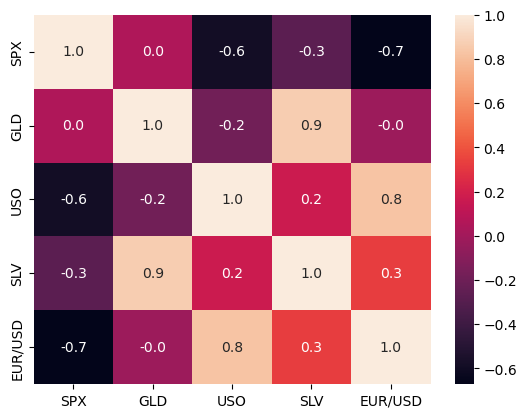

In [18]:
sns.heatmap(gold_data.corr(),annot=True,fmt='0.1f')

In [21]:
correlation=gold_data.corr()

C:\Users\julah\AppData\Local\Temp\ipykernel_14096\361041759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


In [22]:
correlation["GLD"]

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\julah\AppData\Local\Temp\ipykernel_14096\3097373201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data["GLD"],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

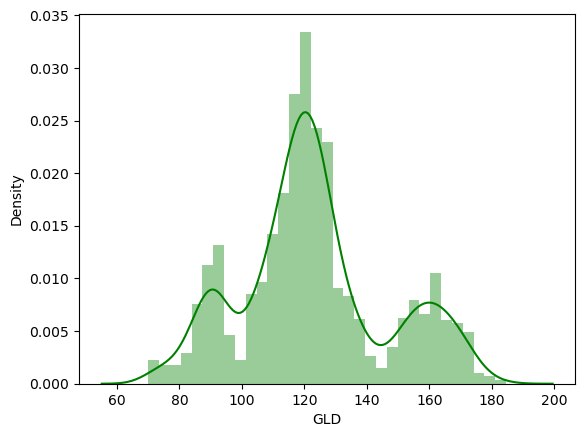

In [23]:
sns.distplot(gold_data["GLD"],color='green')

<Axes: xlabel='GLD', ylabel='Count'>

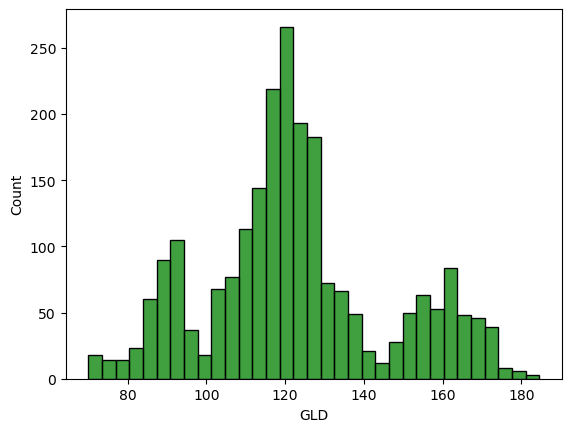

In [24]:
sns.histplot(gold_data["GLD"],color='green')

In [26]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [27]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [28]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [34]:
regressor=RandomForestRegressor(n_estimators=100)

In [35]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
test_data_prediction=regressor.predict(x_test)

In [37]:
print(test_data_prediction)

[168.60659947  81.96719994 116.20839956 127.63870068 120.92270158
 154.66339717 150.32469842 126.00330054 117.42529872 125.93570142
 116.79700086 171.8491008  141.81799868 168.09129852 115.18860005
 117.7525006  139.02450287 169.98220051 159.65830355 158.84870031
 155.25029986 125.77890038 176.22430006 157.40030334 125.20020024
  93.76839974  78.03349998 120.48710018 119.20079963 167.52059907
  88.34430023 125.2915001   91.32210127 117.57120036 121.15249929
 136.27860073 115.71940106 115.09480063 148.92599985 107.0543009
 104.09360241  87.12679788 126.43140032 117.80260048 152.90629869
 119.6713     108.37939964 108.07909788  93.10790031 127.08529792
  74.61650085 113.67679943 121.41060024 111.43209926 118.91549899
 120.61639964 159.4571006  167.78910125 147.2438969   85.86319863
  94.52140022  86.83019876  90.45940038 119.01730061 126.4155006
 127.6879004  170.56759992 122.27899932 117.45069887  98.4165002
 167.92190236 143.19729835 131.77260259 121.1754024  121.01589947
 119.67000061

In [38]:
error_score=metrics.r2_score(y_test,test_data_prediction)
error_score

0.9890510308608663

In [58]:
y_test=list(y_test)

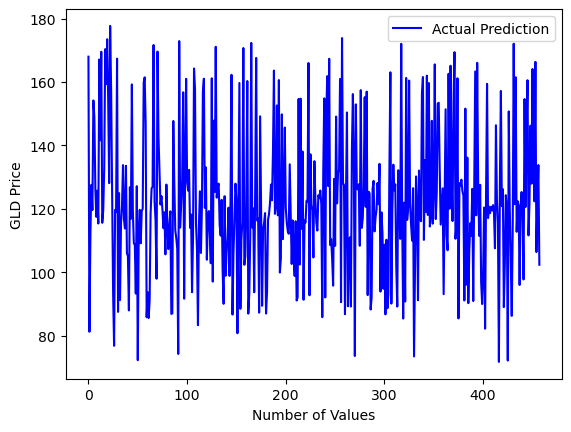

In [62]:
plt.plot(y_test,color='blue',label='Actual Prediction')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

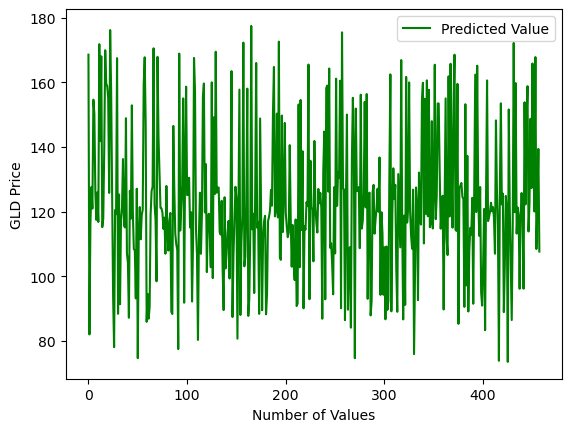

In [63]:
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

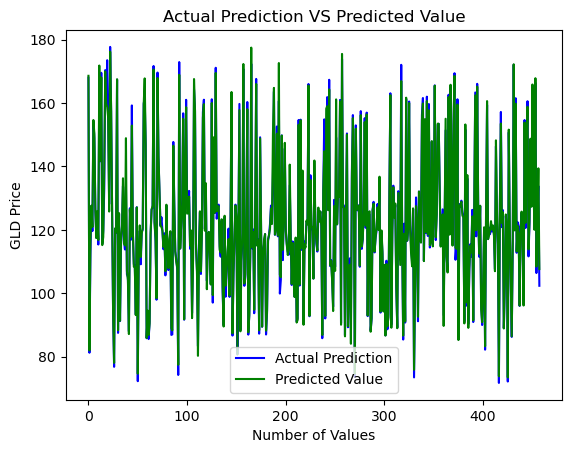

In [64]:
plt.plot(y_test,color='blue',label='Actual Prediction')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Prediction VS Predicted Value')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [3]:
pip install python-docx


Note: you may need to restart the kernel to use updated packages.


In [6]:
# Correct the data to mark December 10th, 11th, and 12th as absent
import pandas as pd
from docx import Document
corrected_data = [
    ("10 Dec", "Absent", ""),
    ("11 Dec", "Absent", ""),
    ("12 Dec", "Absent", ""),
    ("13 Dec", "Present", "Today: RAG, basic principles, flow diagram, Indexing, retrieval, generator, retrieval Quarry architecture and retrieval document, techniques of RAG (context and prompt tuning), torch module, GAN (StyleGAN)"),
    ("16 Dec", "Present", "Learned about: different types of PDF loading modules (Pypdf2, UnstructuredPDFLoader), langchain, transforms, sentence transforms, vector database, OpenAI API, DPRContextEncoder, DPRQuestionEncoder, DPRContextEncoderTokenizer, DPRQuestionEncoderTokenizer. Worked on: Creating QN to ANS RAG from PDF file, completed up to creating vector database."),
    ("17 Dec", "Present", "Learned about: nltk text tokenize, lang chain, huggingface datasets, sequence to sequence architecture building. Worked on: Creating QN to ANS RAG model."),
    ("18 Dec", "Present", "Worked on: Creating QN to ANS RAG model with tokenization and layer building. Learned about: GAN models and architecture."),
    ("19 Dec", "Present", "Worked on: Creating QN to ANS RAG model with tokenization and layer building using bidirectional LSTM."),
    ("20 Dec", "Present", "Worked on: English to Telugu translation. Learned about: Sub word tokenization."),
    ("23 Dec", "Present", "Worked on: Model building and training for English to Telugu. Learned about: One-hot encoding."),
    ("24 Dec", "Present", "Worked on: Model English to Telugu (training completed). Learned about: Greedy decoding, beam search."),
    ("25 Dec", "Holiday", "Christmas Day"),
    ("26 Dec", "Present", "Worked on: Training model and data collection. Learned about: Transforms approach."),
    ("27 Dec", "Present", "Worked on: Training model and data collection. Learned about: Encoder and decoder approach."),
]

# Create a new Word document
doc = Document()

# Add a title

# Add a table for the data
table = doc.add_table(rows=1, cols=3)
table.style = 'Table Grid'

# Define the headers
headers = ['Date', 'Attendance Status', 'Work Done']
hdr_cells = table.rows[0].cells
for i, header in enumerate(headers):
    hdr_cells[i].text = header

# Populate the table with the corrected data
for entry in corrected_data:
    row_cells = table.add_row().cells
    for i, value in enumerate(entry):
        row_cells[i].text = value

# Save the corrected document
file_path = r"C:\Users\julah\Downloads\attendence13to27.docx"
doc.save(file_path)

file_path


'C:\\Users\\julah\\Downloads\\attendence13to27.docx'